In [1]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Cindy\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = df.iloc[:,0:13]
y = df.iloc[:,-1]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
BestFeature = SelectKBest(score_func=f_classif, k=13)
fit = BestFeature.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']
featureScores

,Column,Score
0,age,16.116700
1,sex,25.792191
2,cp,69.772271
3,trtbps,6.458169
4,chol,2.202983
5,fbs,0.236942
6,restecg,5.777209
7,thalachh,65.120104
8,exng,70.952438
9,oldpeak,68.551439


In [5]:
print(featureScores.nlargest(13,'Score'))

      Column      Score
8       exng  70.952438
2         cp  69.772271
9    oldpeak  68.551439
7   thalachh  65.120104
11       caa  54.559834
10       slp  40.902071
12     thall  40.407696
1        sex  25.792191
0        age  16.116700
3     trtbps   6.458169
6    restecg   5.777209
4       chol   2.202983
5        fbs   0.236942


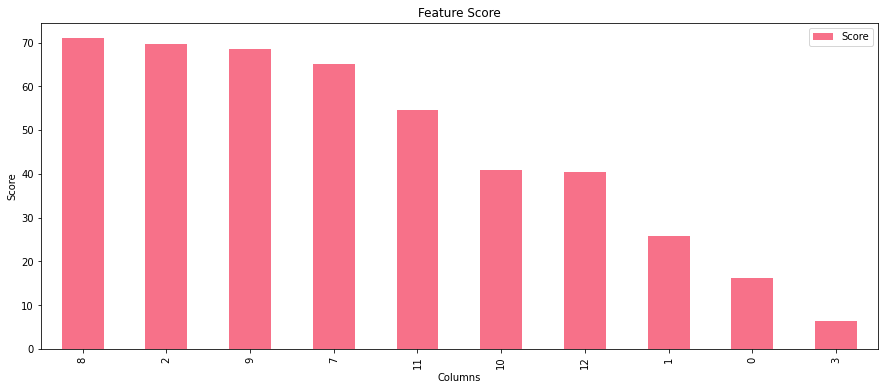

In [6]:
featureScores.nlargest(10,'Score').plot(kind='bar',figsize=(15,6),color=sns.color_palette("husl"))
plt.xlabel('Columns')
plt.ylabel('Score')
plt.title('Feature Score')
plt.show()

In [7]:
from sklearn.feature_selection import chi2
BestFeature = SelectKBest(score_func=chi2, k=13)
fit = BestFeature.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']
featureScores

,Column,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trtbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalachh,188.320472
8,exng,38.914377
9,oldpeak,72.644253


In [8]:
print(featureScores.nlargest(13,'Score'))

      Column       Score
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835
12     thall    5.791853
6    restecg    2.978271
5        fbs    0.202934


In [9]:
from sklearn.feature_selection import mutual_info_classif
BestFeature = SelectKBest(score_func=mutual_info_classif, k=13)
fit = BestFeature.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']
featureScores

,Column,Score
0,age,0.001830
1,sex,0.000000
2,cp,0.078123
3,trtbps,0.000000
4,chol,0.073573
5,fbs,0.000000
6,restecg,0.000000
7,thalachh,0.057282
8,exng,0.088773
9,oldpeak,0.065310


In [10]:
print(featureScores.nlargest(13,'Score'))

      Column     Score
12     thall  0.127574
11       caa  0.111414
8       exng  0.088773
2         cp  0.078123
4       chol  0.073573
9    oldpeak  0.065310
7   thalachh  0.057282
10       slp  0.052474
0        age  0.001830
1        sex  0.000000
3     trtbps  0.000000
5        fbs  0.000000
6    restecg  0.000000
